In [1]:
#Z_SCORE
import pandas as pd

# 读取原始数据
file_path = r'D:\统计建模\原始指标.xlsx'
df = pd.read_excel(file_path)
# 将第一列设置为索引
df.set_index(df.columns[0], inplace=True)

# 正向指标Z-score标准化
for col in df.columns[[1, 4]]:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

# 负向指标Z-score标准化
for col in df.columns[[0,2,3]]:
    df[col] = (df[col].mean() - df[col]) / df[col].std()

# 保存处理后的数据到新文件
output_file = r'D:\统计建模\Z-score标准化后的指标.xlsx'
df.to_excel(output_file)

print("数据已进行Z-score标准化，并保存到新文件中。")

数据已进行Z-score标准化，并保存到新文件中。


In [2]:
#MAXMIN
import pandas as pd

# 读取原始数据
file_path = r'D:\统计建模\原始指标.xlsx'
df = pd.read_excel(file_path)
# 将第一列设置为索引
df.set_index(df.columns[0], inplace=True)

# 正向指标最大最小归一化
for col in df.columns[[1, 4]]:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# 负向指标最大最小归一化
for col in df.columns[[0, 2, 3]]:
    df[col] = (df[col].max() - df[col]) / (df[col].max() - df[col].min())

# 保存处理后的数据到新文件
output_file = r'D:\统计建模\归一化后的指标.xlsx'
df.to_excel(output_file)

print("数据已归一化并保存到新文件中。")

数据已归一化并保存到新文件中。


In [2]:
import pandas as pd

# 读取 Excel 文件
file_path = r'D:\统计建模\Z-score标准化后的指标.xlsx'
df = pd.read_excel(file_path, index_col=0)  # 设置第一列为索引

# 找到数据中的最小值
min_val = df.min().min()

# 计算平移值
epsilon = 1e-6  # 选择一个小的正数，避免出现 ln(0) 的情况
min_shift = -min_val + epsilon

# 对数据进行平移操作
df_shifted = df + min_shift

# 保存平移后的数据到 Excel 文件
output_file_path = r'D:\统计建模\Z-score标准化平移后的指标.xlsx'
df_shifted.to_excel(output_file_path)

print("数据平移并保存成功！")

数据平移并保存成功！


In [3]:
import pandas as pd
import numpy as np

# 读取Excel文件
file_path = r'D:\统计建模\Z-score标准化平移后的指标.xlsx'
df = pd.read_excel(file_path)

# 将窗口列设为索引
df.set_index(df.columns[0], inplace=True)

# 计算每列的熵
def entropy(col):
    p = col / col.sum()
    return -np.sum(p * np.log(p))

entropies = df.apply(entropy)

# 计算每列的权重
weights = (1 - entropies) / (len(df.columns) - entropies.sum())

# 将权重输出到新文件
output_file = r'D:\统计建模\指标权重.xlsx'
weights.to_excel(output_file, header=['权重'])

print("指标权重已输出到文件:", output_file)

指标权重已输出到文件: D:\统计建模\指标权重.xlsx


In [7]:
import pandas as pd
import numpy as np

# 读取Excel文件
file_path = r'D:\统计建模\Z-score标准化平移后的指标.xlsx'
df = pd.read_excel(file_path)

# 将窗口列设为索引
df.set_index(df.columns[0], inplace=True)

# 计算每列的熵
def entropy(col):
    p = col / col.sum()
    return -np.sum(p * np.log(p))

entropies = df.apply(entropy)

# 计算每列的权重
weights = (1 - entropies) / (len(df.columns) - entropies.sum())

# 计算每行的综合绩效
weighted_df = df.apply(lambda row: np.sum(row * weights), axis=1)

# 将综合绩效保存到新的 Excel 文件中
output_file_path = r'D:\统计建模\综合绩效.xlsx'
weighted_df.to_excel(output_file_path, header=['综合绩效'])

print("综合绩效已保存到文件:", output_file_path)

综合绩效已保存到文件: D:\统计建模\综合绩效.xlsx


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# 读取Excel文件
data = pd.read_excel("D:/统计建模/Z-score标准化平移后的指标.xlsx")

# 分割输入和输出
X = data.iloc[:, 0:5].values  # 输入特征
y = data.iloc[:, 5].values    # 输出绩效

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练BP神经网络模型
model = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print("均方误差:", mse)

均方误差: 0.005994910513345514


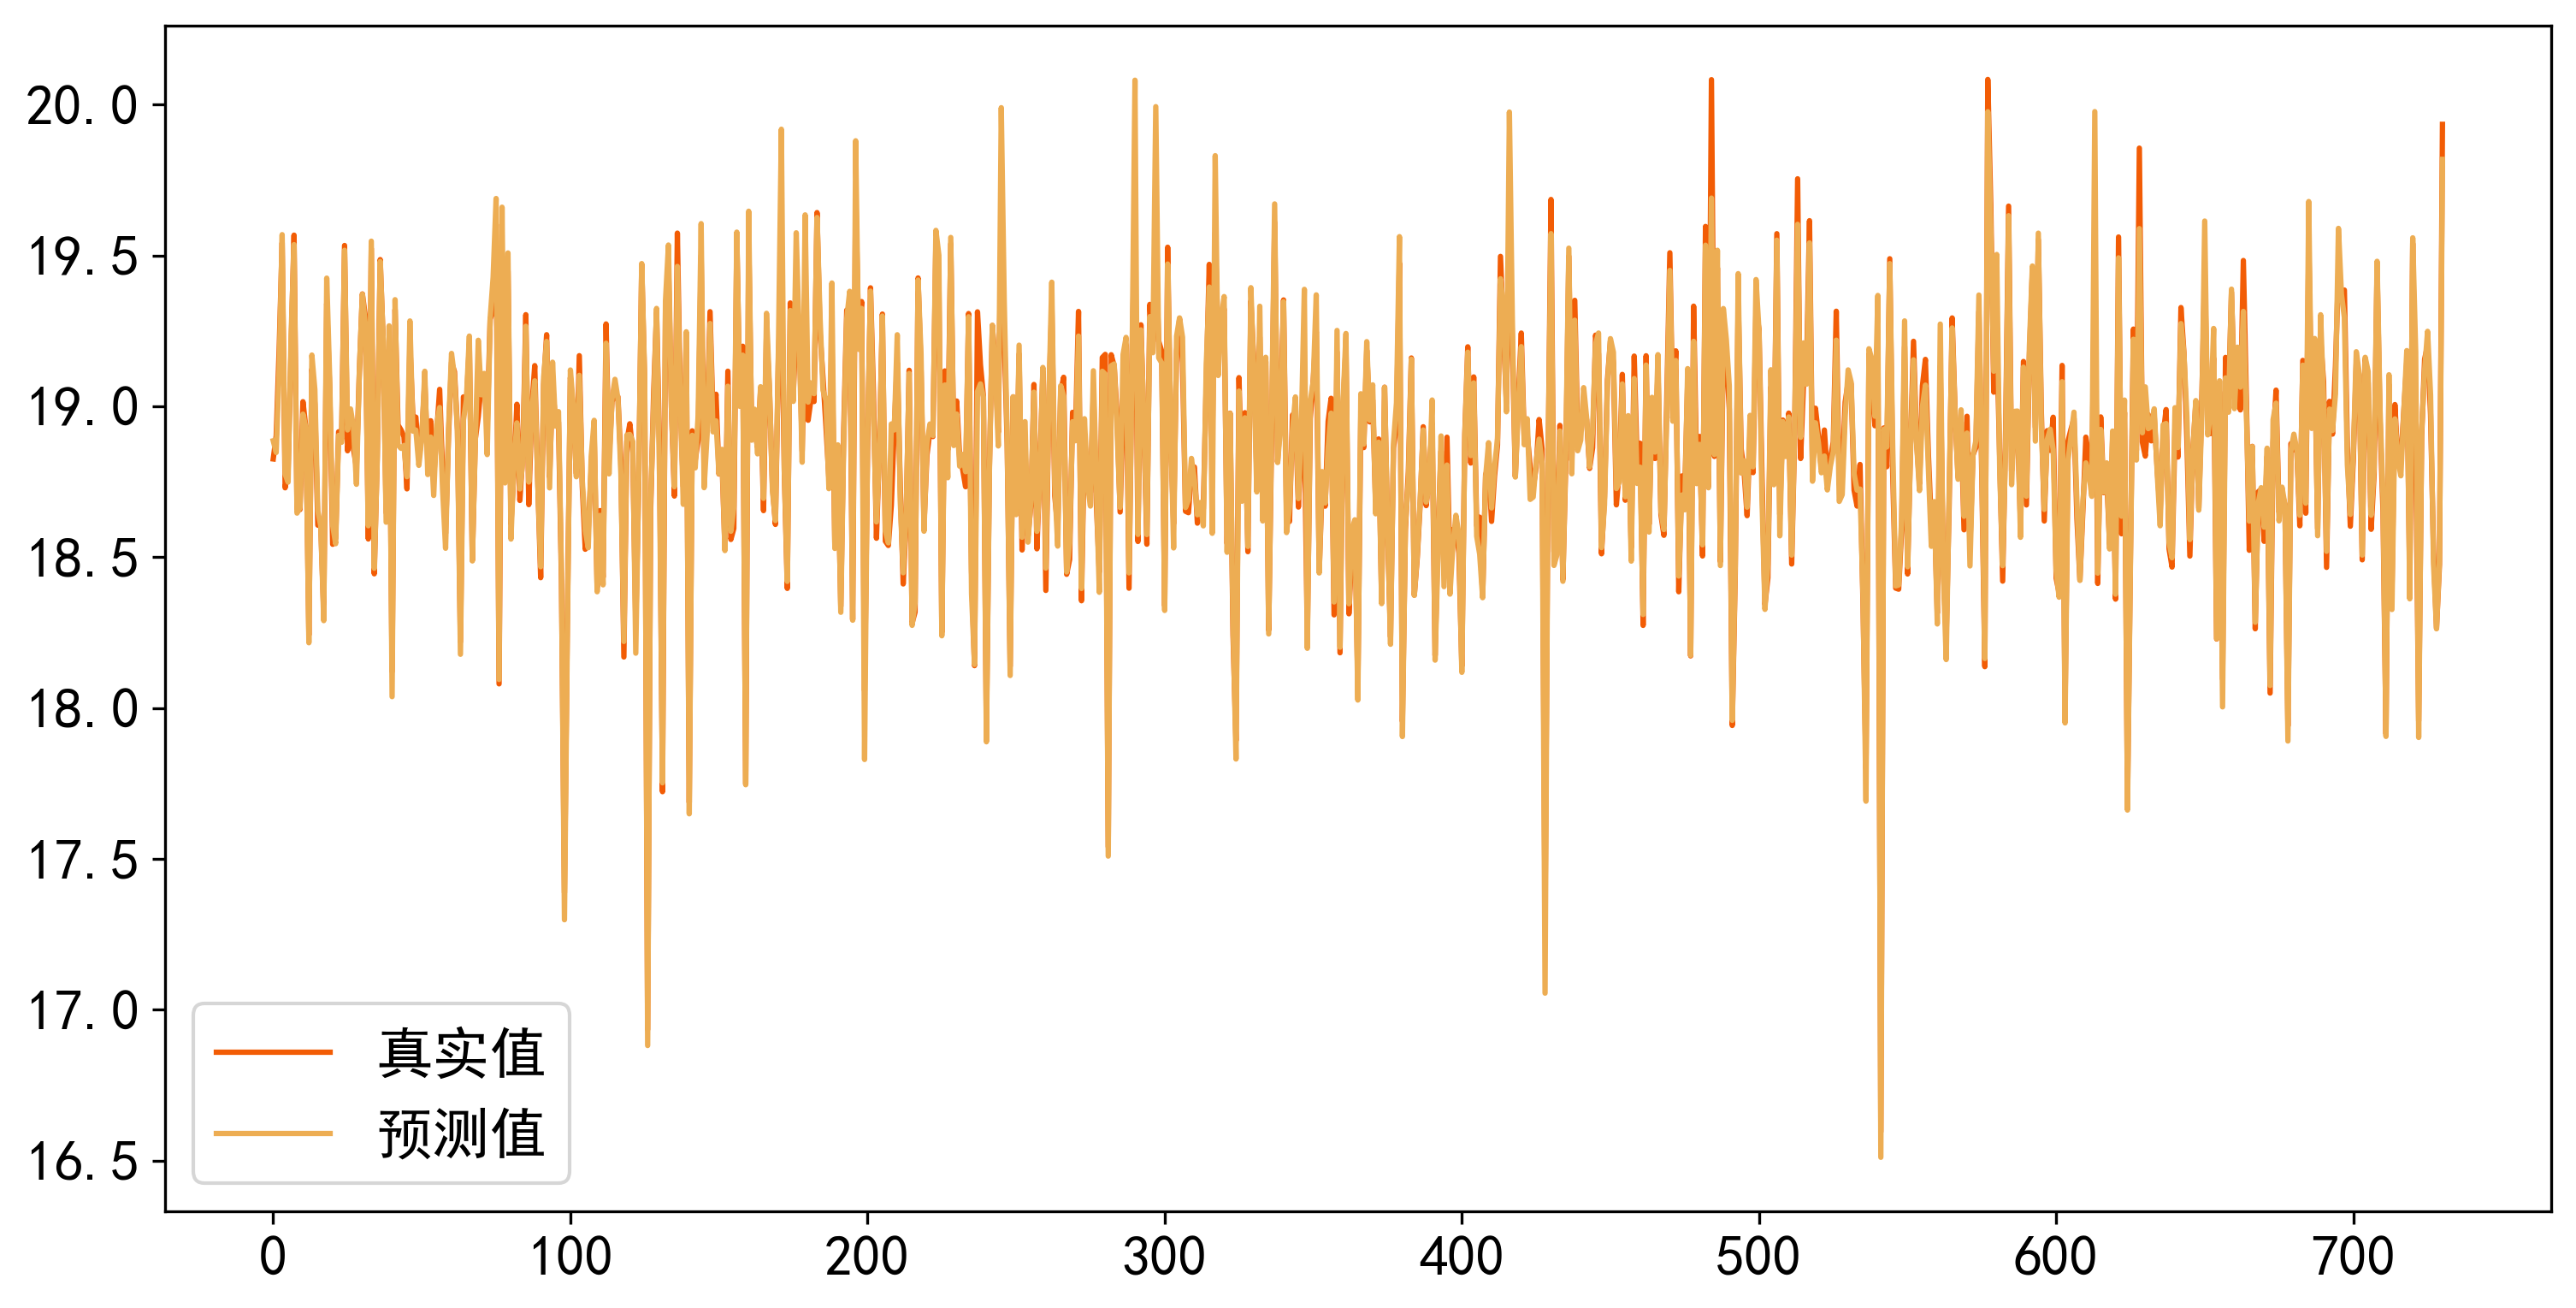

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16 #16号字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 

plt.figure(figsize=(12, 6),dpi=300)

plt.plot(y_test, color='#F25C05', label='真实值',alpha=1)
plt.plot(y_pred, color='#edad53', label='预测值',alpha=1)
plt.legend()
plt.show()

In [18]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# 计算多个评价指标
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# 创建评价指标的字典
evaluation = {
    '均方误差 (MSE)': [mse],
    '均绝对误差 (MAE)': [mae],
    'R平方 (R^2)': [r2],
    '可解释方差 (Explained Variance)': [explained_variance]
}

# 将评价指标转换为DataFrame
evaluation_df = pd.DataFrame(evaluation)

# 输出评价指标表格
print("模型性能评价指标:")
print(evaluation_df)

模型性能评价指标:
   均方误差 (MSE)  均绝对误差 (MAE)  R平方 (R^2)  可解释方差 (Explained Variance)
0    0.005995     0.049461   0.960785                    0.960971
